# Customer Lifetime Value Prediction - CodeClause Internship

## Project ID
#CC69860

## Intern
**Komal Sharma**

## Timeline
- **Start Date:** 01 July 2025
- **End Date:** 01 July 2025 (Completed)

---

## Aim
To **predict the lifetime value of customers** for a business based on their historical interactions using **regression modeling techniques**.

---

## Description
Using a **Kaggle Ecommerce Customer dataset**, this project:
- Handles **messy data cleaning**:
   - Missing values handling
   - Categorical data encoding
   - Outlier removal
   - Feature scaling
- Uses **Linear Regression** to predict **Customer Lifetime Value (CLV)**.
- Evaluates the model using:
   - **Mean Squared Error (MSE)**
   - **R² Score**
- Visualizes:
   - **Actual vs Predicted CLV**
   - **Residuals distribution**

---

## Technologies Used
- **Python**
- **Pandas, Numpy**
- **Scikit-Learn**
- **Matplotlib, Seaborn**

---

## Outputs
✅ MSE and R² Score for model evaluation  
✅ Scatter plot: Actual vs Predicted CLV  
✅ Histogram: Residuals Distribution

---

## What I Learned
✅ Practical **data cleaning and preprocessing** on messy datasets.  
✅ Handling missing values and encoding categorical data effectively.  
✅ Using Linear Regression for predictive modeling.  
✅ Evaluating regression models with appropriate metrics.  
✅ Visualizing results for better interpretation.

---

## Dataset
[Ecommerce Customer Lifetime Value Dataset (Kaggle)](https://www.kaggle.com/datasets/mustafaali96/marketing-customer-value-analysis)

---




In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [26]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [27]:
df = pd.read_excel('Online Retail.xlsx')
df.to_csv('online_retail.csv', index=False)
print("Converted to CSV successfully.")

Converted to CSV successfully.


In [28]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [30]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [31]:
df.dropna(subset=['CustomerID','Description'], inplace=True)

In [32]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [33]:
# For each column, print unique values and count of unique values
print("\nUnique Values in Each Column:")
for col in df.columns:
    unique_values = df[col].unique()
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(unique_values)}")
    # If too many unique values, show only the first 20
    print(f"Sample unique values: {unique_values[:20]}")


Unique Values in Each Column:

Column: InvoiceNo
Number of unique values: 22190
Sample unique values: [536365 536366 536367 536368 536369 536370 536371 536372 536373 536374
 536375 536376 536377 536378 536380 536381 'C536379' 536382 'C536383'
 536384]

Column: StockCode
Number of unique values: 3684
Sample unique values: ['85123A' 71053 '84406B' '84029G' '84029E' 22752 21730 22633 22632 84879
 22745 22748 22749 22310 84969 22623 22622 21754 21755 21777]

Column: Description
Number of unique values: 3896
Sample unique values: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT'
 "POPPY'S PLAYHOUSE BEDROOM " "POPPY'S PLAYHOUSE KITCHEN"
 'FELTCRAFT PRINCESS CHARLOTTE DOLL' 'IVORY KNITTED MUG COSY '
 'BOX OF 6 ASSORTED COLOUR 

In [34]:
df=df[df['Quantity'] > 0]

In [35]:
# Remove cancelled orders (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [36]:
# Remove outlier UnitPrice values
df = df[df['UnitPrice'] < df['UnitPrice'].quantile(0.99)]

In [37]:
# Feature Engineering
# Calculate TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [38]:
# Group by CustomerID
customer_df = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',                # Total transactions
    'Quantity': 'sum',                     # Total quantity purchased
    'UnitPrice': 'mean',                   # Average price
    'TotalPrice': 'sum'                    # Total spent (CLV)
}).reset_index()

In [39]:
customer_df.rename(columns={
    'InvoiceNo': 'Num_Transactions',
    'Quantity': 'Total_Quantity',
    'UnitPrice': 'Avg_Price',
    'TotalPrice': 'Customer_Lifetime_Value'
}, inplace=True)

print(customer_df.head())

   CustomerID  Num_Transactions  Total_Quantity  Avg_Price  \
0     12346.0                 1           74215   1.040000   
1     12347.0                 7            2458   2.644011   
2     12348.0                 4            2332   0.692963   
3     12349.0                 1             625   3.560000   
4     12350.0                 1             196   1.581250   

   Customer_Lifetime_Value  
0                 77183.60  
1                  4310.00  
2                  1437.24  
3                  1353.80  
4                   294.40  


In [40]:
# Prepare Data
features = ['Num_Transactions', 'Total_Quantity', 'Avg_Price']
target = 'Customer_Lifetime_Value'

X = customer_df[features]
y = customer_df[target]


In [41]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [42]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [43]:
# Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [44]:
# Prediction
y_pred = model.predict(X_test_scaled)

In [45]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 3155508.3548664716
R^2 Score: 0.9201651562358897


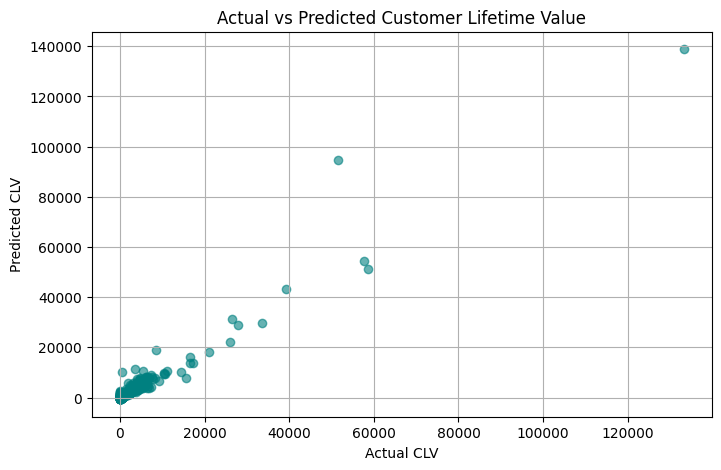

In [46]:
# Visualizations
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV")
plt.title("Actual vs Predicted Customer Lifetime Value")
plt.grid(True)
plt.show()

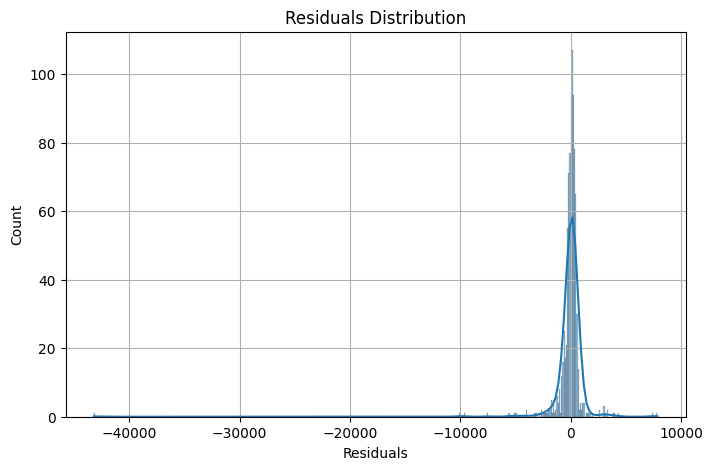


Project Completed: Customer Lifetime Value Prediction using Online Retail dataset.


In [47]:
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()

print("\nProject Completed: Customer Lifetime Value Prediction using Online Retail dataset.")